### 统计SV基本信息	
*	SV per sample	
*	neoloop per sample

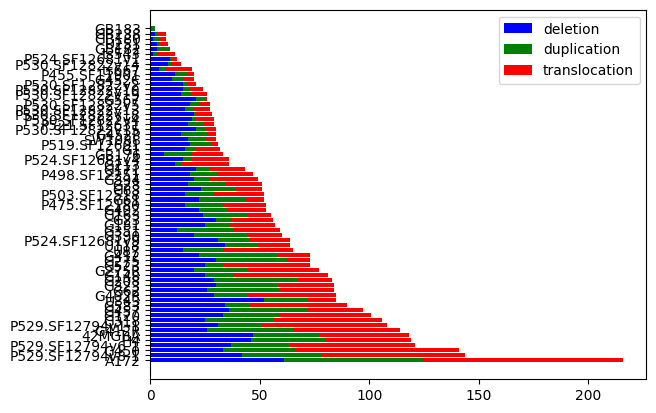

In [8]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from glob import glob

# 定义文件路径
file_path = '/cluster/home/tmp/GBM/HiC/11SV/eaglec_new/result/SV/*.CNN_SVs.5K_combined_uniq.txt'

# 读取所有文件
files = glob(file_path)

# 初始化一个字典来存储每个文件的字符计数
char_counts = {}

# 遍历每个文件
for file in files:
    # 移除文件名中的特定后缀部分
    file_label = os.path.basename(file).replace('.CNN_SVs.5K_combined_uniq.txt', '')
    # 读取文件
    data = pd.read_csv(file, sep='\t', header=None)
    # 初始化当前文件的字符计数
    if file_label not in char_counts:
        char_counts[file_label] = {'deletion': 0, 'duplication': 0, 'translocation': 0}
    # 统计第6列的字符
    for char in data.iloc[:, 5]:
        if char == 'deletion':
            char_counts[file_label]['deletion'] += 1
        elif char == 'duplication':
            char_counts[file_label]['duplication'] += 1
        elif char == 'translocation':
            char_counts[file_label]['translocation'] += 1

# 准备数据用于绘图
labels = list(char_counts.keys())
data = [char_counts[label]['deletion'] for label in labels]
data2 = [char_counts[label]['duplication'] for label in labels]
data3 = [char_counts[label]['translocation'] for label in labels]

# 计算总数并排序
total_counts = [data[i] + data2[i] + data3[i] for i in range(len(labels))]
sorted_indices = sorted(range(len(total_counts)), key=lambda i: total_counts[i], reverse=True)
labels_sorted = [labels[i] for i in sorted_indices]
data_sorted = [data[i] for i in sorted_indices]
data2_sorted = [data2[i] for i in sorted_indices]
data3_sorted = [data3[i] for i in sorted_indices]

# 绘制水平堆叠柱状图
plt.barh(labels_sorted, data_sorted, left=0, label='deletion', color='blue')
plt.barh(labels_sorted, data2_sorted, left=data_sorted, label='duplication', color='green')
plt.barh(labels_sorted, data3_sorted, left=[data_sorted[i]+data2_sorted[i] for i in range(len(labels_sorted))], label='translocation', color='red')

# 添加图例
plt.legend()

# 显示图表
plt.show()

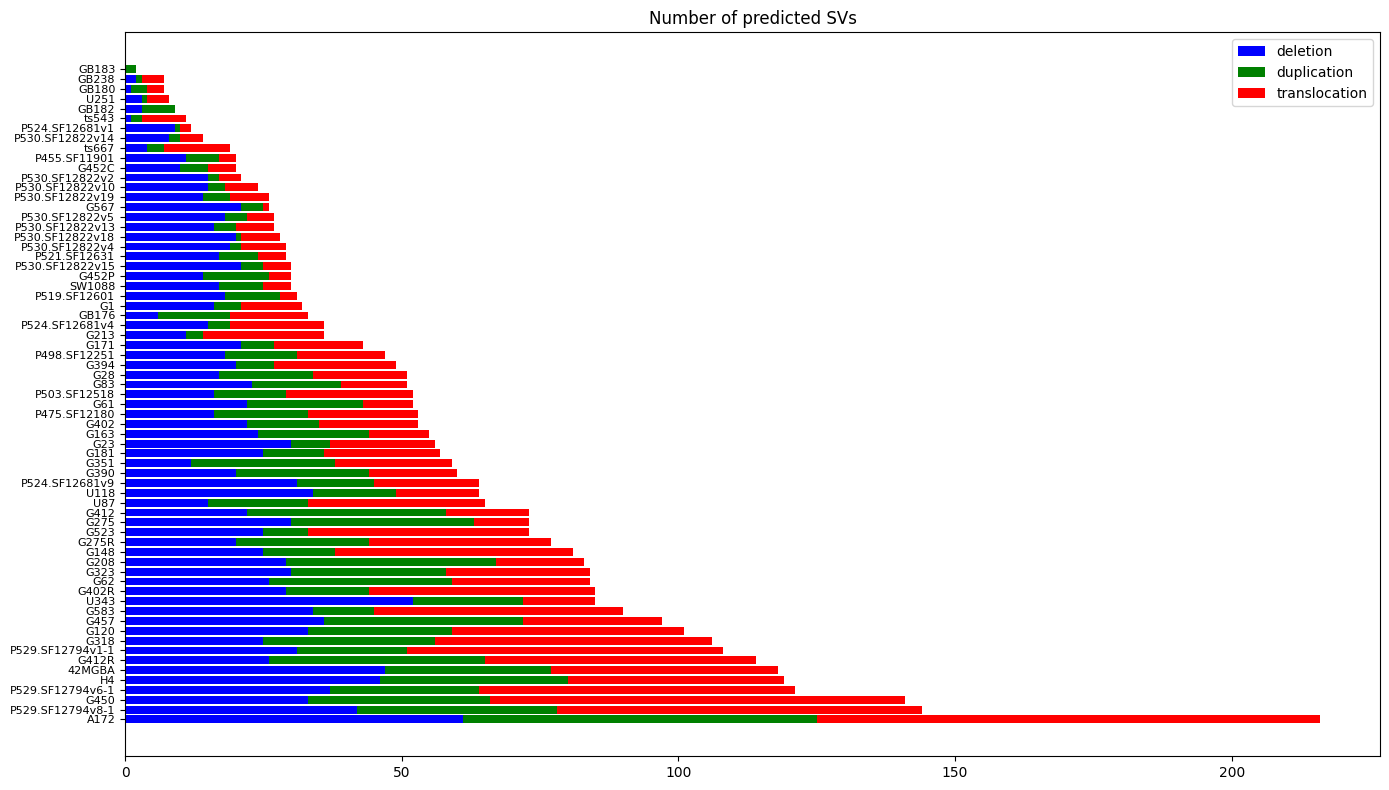

In [16]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from glob import glob

# 定义文件路径
file_path = '/cluster/home/tmp/GBM/HiC/11SV/eaglec_new/result/SV/*.CNN_SVs.5K_combined_uniq.txt'

# 读取所有文件
files = glob(file_path)

# 初始化一个字典来存储每个文件的字符计数
char_counts = {}

# 遍历每个文件
for file in files:
    # 移除文件名中的特定后缀部分
    file_label = os.path.basename(file).replace('.CNN_SVs.5K_combined_uniq.txt', '')
    # 读取文件
    data = pd.read_csv(file, sep='\t', header=None)
    # 初始化当前文件的字符计数
    if file_label not in char_counts:
        char_counts[file_label] = {'deletion': 0, 'duplication': 0, 'translocation': 0}
    # 统计第6列的字符
    for char in data.iloc[:, 5]:
        if char == 'deletion':
            char_counts[file_label]['deletion'] += 1
        elif char == 'duplication':
            char_counts[file_label]['duplication'] += 1
        elif char == 'translocation':
            char_counts[file_label]['translocation'] += 1

# 准备数据用于绘图
labels = list(char_counts.keys())
data = [char_counts[label]['deletion'] for label in labels]
data2 = [char_counts[label]['duplication'] for label in labels]
data3 = [char_counts[label]['translocation'] for label in labels]

# 计算总数并排序
total_counts = [data[i] + data2[i] + data3[i] for i in range(len(labels))]
sorted_indices = sorted(range(len(total_counts)), key=lambda i: total_counts[i], reverse=True)
labels_sorted = [labels[i] for i in sorted_indices]
data_sorted = [data[i] for i in sorted_indices]
data2_sorted = [data2[i] for i in sorted_indices]
data3_sorted = [data3[i] for i in sorted_indices]

# 绘制水平堆叠柱状图
plt.figure(figsize=(14, 8))  # 增加图表的高度
plt.barh(labels_sorted, data_sorted, left=0, label='deletion', color='blue')
plt.barh(labels_sorted, data2_sorted, left=data_sorted, label='duplication', color='green')
plt.barh(labels_sorted, data3_sorted, left=[data_sorted[i]+data2_sorted[i] for i in range(len(labels_sorted))], label='translocation', color='red')

# 旋转Y轴标签
plt.yticks(fontsize=8)

# 添加图例
plt.legend()
plt.title('Number of predicted SVs')

# 显示图表
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()

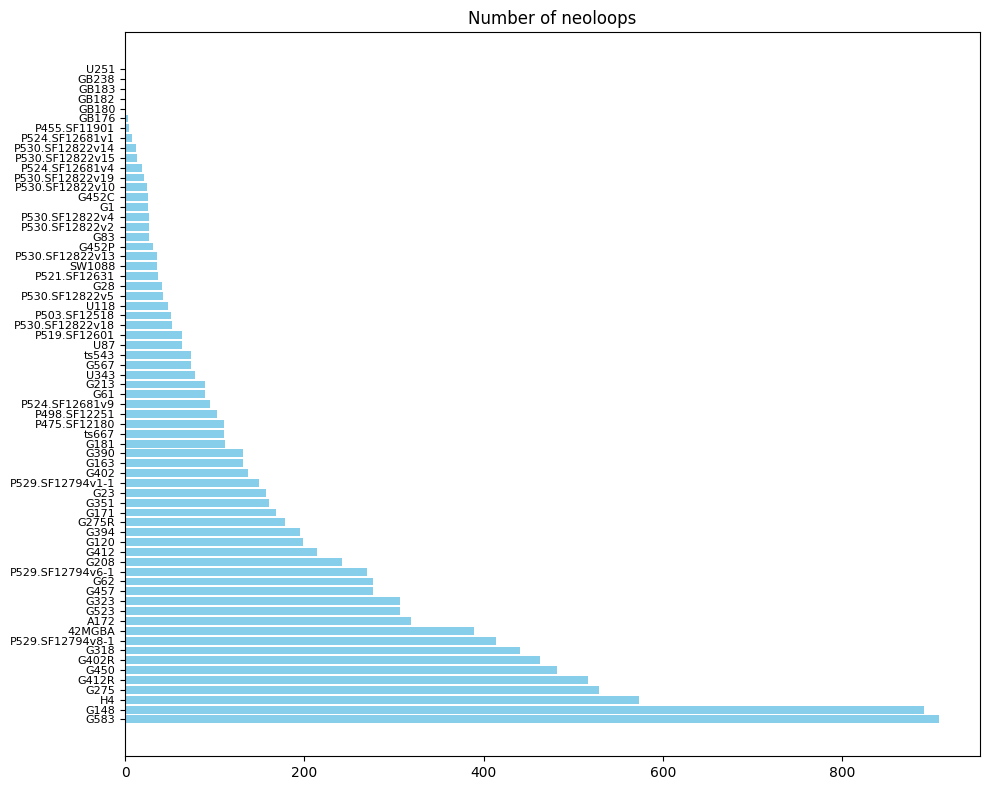

In [6]:
import os
import glob
import matplotlib.pyplot as plt

# 定义文件路径模式
file_pattern = "/cluster/home/tmp/GBM/HiC/11SV/eaglec_new/result/neoloop/*.neo-loops_1.txt"

# 初始化一个列表来存储文件名和行数
file_line_counts = []

# 遍历匹配的文件
for file_path in glob.glob(file_pattern):
    # 移除文件名中的特定后缀部分
    file_label = os.path.basename(file_path).replace('.neo-loops_1.txt', '')
    # 计算文件的行数
    with open(file_path, 'r') as file:
        line_count = sum(1 for line in file)
    # 将文件名和行数存储到列表中
    file_line_counts.append((file_label, line_count))

# 按照行数排序
file_line_counts_sorted = sorted(file_line_counts, key=lambda x: x[1], reverse=True)

# 准备数据用于绘图
labels = [item[0] for item in file_line_counts_sorted]
lines = [item[1] for item in file_line_counts_sorted]

# 绘制水平柱状图
plt.figure(figsize=(10, 8))  # 可以调整大小以适应图表
plt.barh(labels, lines, color='skyblue')

# 设置Y轴标签
#plt.xlabel('Number of Lines')
# 设置标题
plt.title('Number of neoloops')
plt.yticks(fontsize=8)
# 显示图表
plt.tight_layout()  # 自动调整子图参数, 使之填充整个图像区域
plt.show()